**<font size=5>Exercises for demensionality reduction</font>**

1. 减少数据集维数的主要动机是什么？ 主要缺点是什么？

降维的主要动机是：<br>
为了加快后续训练算法的速度（在某些情况下，它甚至可能去除噪音和冗余特征，从而使训练算法的性能更好）<br>
可视化数据并了解最重要的特征<br>
节省空间（压缩）

主要缺点是：<br>
某些信息丢失，可能会降低后续训练算法的性能。<br>
它可能需要大量计算。<br>
它为您的机器学习管道增加了一些复杂性。<br>
转换后的特征通常很难解释

2. 维数诅咒是什么？

维数诅咒指的是在高维空间中出现了许多在低维空间中不存在的问题。在机器学习中，一个常见的表现是，随机采样的高维向量通常非常稀疏，从而增加了过度拟合的风险，并且在没有大量训练数据的情况下，很难识别数据中的模式。

3. 降低数据集的维数后，是否可以逆转操作？ 如果是这样，怎么办？ 如果没有，为什么？ 

一旦使用我们讨论的算法之一降低了数据集的维数，几乎总是不可能完全逆转该操作，因为在降维过程中会丢失一些信息。此外，尽管某些算法（例如PCA）具有简单的逆向转换过程，例如inverse_transform()可以重建相对类似于原始数据集的数据集，但其他算法（例如T-SNE）则没有。

4. 可以使用PCA来减少高度非线性数据集的维数吗？

即使它们是高度非线性的，PCA也可以用来显着降低大多数数据集的维数，因为它至少可以消除无用的维数。但是，如果没有无用的维数（例如在瑞士卷数据集中），则使用PCA降维将丢失太多信息。例如，您想展开瑞士卷，而不是压扁。瑞士卷最好用t-SNE模型

5. 假设您在1000维数据集上执行PCA，将解释的方差比设置为95％。结果数据集将具有多少个维度？

这是一个棘手的问题：它取决于数据集。让我们看两个极端的例子。首先，假设数据集由几乎完美对齐的点组成。在这种情况下，PCA可以将数据集缩减为仅有一维，同时仍保留95％的方差。现在想象一下，数据集由完全随机的点组成，散布在1000个维度上。 在这种情况下，大约需要950个维度才能保留95％的差异。因此答案是，它取决于数据集，并且可以是1到950之间的任何数字。将解释的方差绘制为维数的函数是一种大致了解数据集固有维数的方法。

6. 在什么情况下，您将使用PCA，增量PCA，随机PCA或内核PCA？

常规PCA是默认设置，但仅在数据集适合内存时才起作用。增量PCA对于无法容纳在内存中的大型数据集很有用，但它比常规PCA慢，因此，如果数据集适合在内存中，则您应该首选常规PCA。增量PCA对于联机任务也很有用，当您需要动态应用PCA时，每次有新实例到达时。当您想大幅降低维数并且数据集适合内存时，随机PCA很有用。在这种情况下，它比常规PCA快得多。最后，内核PCA对于非线性数据集很有用。

7. 您如何评估数据集上降维算法的性能？

直观地，降维算法如果在不损失太多信息的情况下从数据集中消除了很多维度，则效果很好。一种测量方法是应用逆变换并测量重建误差。但是，并非所有降维算法都提供逆变换。或者，如果将降维用作另一种机器学习算法（例如，Random Forest分类器）之前的预处理步骤，则可以简单地测量第二种算法的性能;如果降维不会丢失太多信息，则该算法的性能应与使用原始数据集时一样好。

8. 链接两个不同的降维算法是否有意义？

链接两个不同的降维算法绝对有意义。一个常见的示例是使用PCA快速摆脱大量无用的特征，然后应用另一种慢得多的降维算法，例如LLE。这种分两步走的方法可能会产生与仅使用LLE相同的性能，但是时间却很少。

9. 加载digits数据集，并将其分为训练集和测试集（80%的实例用于训练，其余20%用于测试）。在数据集上训练随机森林分类器，并确定需要花费多长时间，然后在测试集上评估结果模型。接下来，使用PCA降低数据集的维数，其解释的差异率为95％。在精简数据集上训练新的随机森林分类器，并查看需要花费多长时间。训练速度快得多了吗？ 接下来，评估测试集上的分类器。与之前的分类器相比如何？

①首先，加载digits数据集

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [4]:
digit = load_digits()
X, y = digit.data, digit.target

In [5]:
X.shape

(1797, 64)

有1797行数据，每条数据由8*8个特征组成

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
X_train.shape

(1437, 64)

80%是训练集，20%是测试集

②在训练集上训练随机森林分类器，并确定需要花费多长时间，然后在测试集上评估结果模型。

In [25]:
from sklearn.ensemble import RandomForestClassifier
import time

rnd_clf = RandomForestClassifier(n_estimators=50, random_state=42)
t0 = time.time()
rnd_clf.fit(X_train, y_train)
t1 = time.time()
initialTrainTime = t1 - t0

In [26]:
initialTrainTime

0.6790390014648438

In [27]:
rnd_clf.score(X_test, y_test)

0.9638888888888889

③使用PCA降低数据集的维数

In [28]:
from sklearn.decomposition import PCA

In [29]:
pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

In [32]:
X_train_reduced.shape

(1437, 28)

In [20]:
rnd_clf2 = RandomForestClassifier(n_estimators=50, random_state=42)
t0 = time.time()
rnd_clf2.fit(X_train_reduced, y_train)
t1 = time.time()
reducedTrainTime = t1 - t0

In [21]:
reducedTrainTime

1.2700729370117188

不好了！训练实际上现在慢了两倍多！怎么可能？好的，正如我们在本章中看到的那样，**<font color="red">降维并不总能带来更快的训练时间：它取决于数据集、模型和训练算法。</font>** 如果您尝试使用softmax分类器而不是随机森林分类器，则会发现使用PCA时训练时间减少了3倍。实际上，我们将在一秒钟内执行此操作，但首先让我们检查新随机森林分类器的精度。

In [33]:
X_test_reduced = pca.transform(X_test)

In [34]:
rnd_clf2.score(X_test_reduced, y_test)

0.9805555555555555

纳尼！测试集上的score居然高了，可能是偶然原因。降维时，性能通常会略有下降，因为在此过程中我们确实会丢失一些有用的信息。

④换成softmax查看一下

solver:{"newton-cg","lbfgs", "liblinear", "sag", "saga"},这里我们进行的不是二分类问题，所以我建议不再使用liblinear，可以使用saga，或者是其他的来尝试，这样的话上面的参数就需要来调整了，还有一点就是，小数据量用liblinear如果是多分类任务，则用 ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ ； ‘liblinear’ 只能用于二分类问题。
‘newton-cg’, ‘lbfgs’ and ‘sag’只处理 L2 范式的正则项，而 ‘liblinear’ and ‘saga’ 只处理 L1范式的正则项.


In [43]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
t0 = time.time()
log_clf.fit(X_train, y_train)
t1 = time.time()
t1 - t0

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9410538673400879

In [45]:
log_clf.score(X_test, y_test)

0.9611111111111111

In [46]:
t0 = time.time()
log_clf.fit(X_train_reduced, y_train)
t1 = time.time()
t1 - t0

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.6750388145446777

In [47]:
log_clf.score(X_test_reduced, y_test)

0.9555555555555556

logisticRegression在测试集上的表现稍差一些，但是训练时间比随机森林快。

10. 使用t-SNE将digits数据集降至二维，并使用Matplotlib绘制结果。您可以使用具有10种不同颜色的散点图来表示每个图像的目标类别。或者，您可以将散点图中的每个点替换为相应实例的类（0到9之间的数字），甚至可以绘制数字图像本身的按比例缩小的版本（如果您绘制所有数字，则可视化会太混乱，因此，您应该绘制随机样本或仅在没有其他实例在近距离处绘制的情况下绘制实例）。您应该获得一个很好的可视化效果，其中包含相互分隔的数字簇。尝试使用其他降维算法，例如PCA，LLE或MDS，并比较结果的可视化效果。

**使用t-SNE降维**

In [66]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)

In [67]:
X_reduced.shape

(1797, 2)

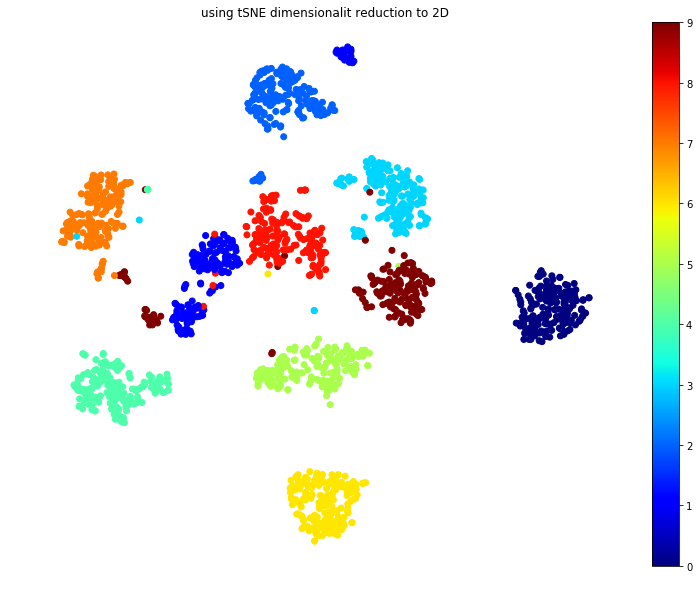

In [68]:
plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.title("using tSNE dimensionalit reduction to 2D")
plt.show()

此图可告诉我们哪些数字可以轻易与其他数字区分开（例如，0、6和7大部分是很好分开的簇），它还告诉我们哪些数字通常很难区分（例如8和2，3和9依此类推）

或者，您可以在每个实例的位置写彩色数字，甚至可以绘制数字图像本身的按比例缩小版本（如果绘制所有数字，则可视化将太杂乱，因此您应该绘制随机样本或绘图,仅当尚未在近距离处绘制其他实例时才可以使用该实例）。您应该得到一个很好的可视化效果，其中包含完全分开的数字簇。

让我们创建一个plot_digits（）函数，该函数将绘制一个散点图（类似于上面的散点图），并写入彩色数字，并保证这些数字之间的最小距离。如果提供了数字图像，则将其绘制出来。 此实现的灵感来自Scikit-Learn的出色示例之一（plot_lle_digits，基于不同的数字数据集）。

In [72]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
import matplotlib as mpl          

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    # 将特征缩放为【0,1】
    X_normalized = MinMaxScaler().fit_transform(X)
    # 创建到目前为止绘制的数字的坐标列表。
    # 避免使用if语句
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = mpl.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=[cmap(digit / 9)])
    plt.axis("off")
    ax = plt.gcf().gca()  # get current axes in current figure
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(np.array(neighbors) - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(8, 8)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)

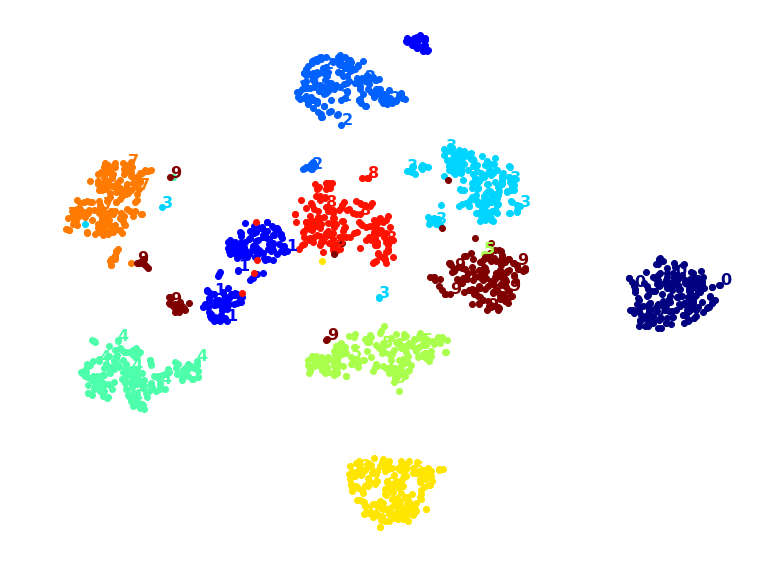

In [73]:
plot_digits(X_reduced, y)

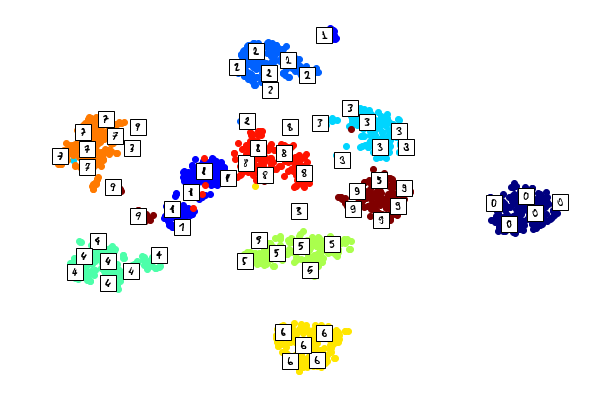

In [75]:
plot_digits(X_reduced, y, images=X, figsize=(10, 7))

**PCA**

PCA took 0.3s.


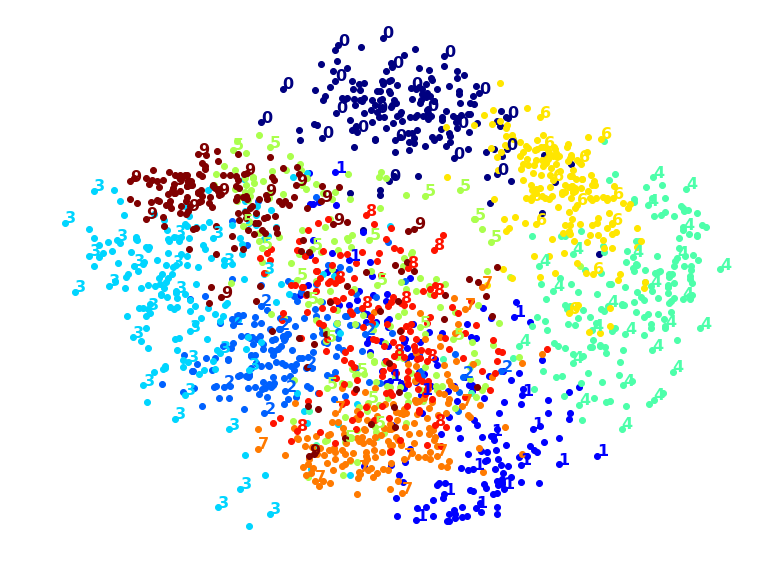

In [76]:
from sklearn.decomposition import PCA
import time

t0 = time.time()
X_pca_reduced = PCA(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("PCA took {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_reduced, y)
plt.show()

**LLE局部线性嵌入**

LLE took 3.0s.


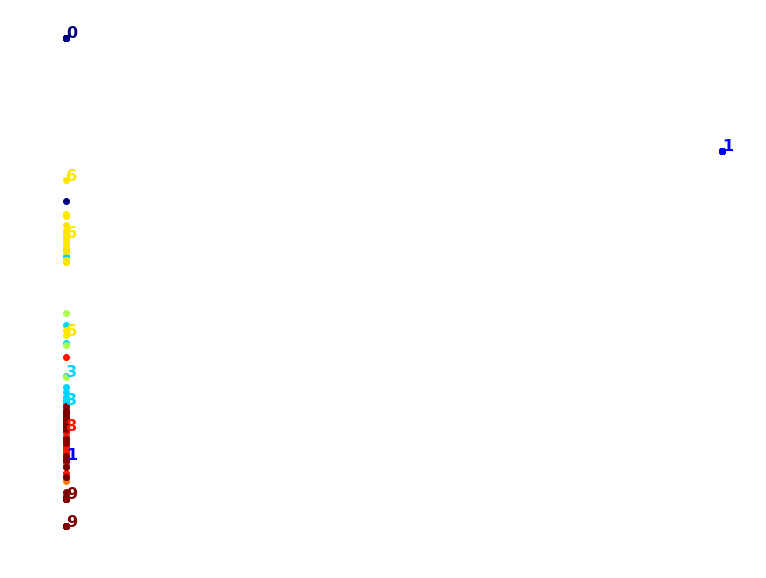

In [77]:
from sklearn.manifold import LocallyLinearEmbedding

t0 = time.time()
X_lle_reduced = LocallyLinearEmbedding(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("LLE took {:.1f}s.".format(t1 - t0))
plot_digits(X_lle_reduced, y)
plt.show()

**多维缩减MDS**

In [ ]:
from sklearn.manifold import MDS

t0 = time.time()
X_mds_reduced = MDS(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("MDS took {:.1f}s.".format(t1 - t0))
plot_digits(X_mds_reduced, y)
plt.show()